In [1]:
import cPickle as pickle
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import os

In [40]:
import glob
import itertools
import cPickle as pickle

In [5]:
RESULTS_DIR = '/n/regal/pfister_lab/PERCEPTION/CROSSNETWORK/'

In [32]:
experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']

all_labels = {'C.Figure1.position_common_scale': ['Position Y', '+ Position X', '+ Spotsize'], \
              'C.Figure1.position_non_aligned_scale': ['Scale', '+ Position Y', '+ Position X', '+ Spotsize'],\
              'C.Figure1.length': ['Length', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.direction': ['Direction', '+ Position Y', '+ Position X'], \
              'C.Figure1.angle': ['Angle', '+ Position Y', '+ Position X'], \
              'C.Figure1.area': ['Area', '+ Position Y', '+ Position X'], \
              'C.Figure1.volume': ['Volume', '+ Position Y', '+ Position X'], \
              'C.Figure1.curvature': ['Curvature', '+ Position Y', '+ Position X', '+ Width'], \
              'C.Figure1.shading': ['Shading', '+ Position Y', '+ Position X']
              }

In [67]:
RUNS = 4
CLASSIFIERS = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

for e in experiments:
    all_files = os.listdir(RESULTS_DIR+e)
    
    if len(all_files) != RUNS * len(CLASSIFIERS):
        
        for c in CLASSIFIERS:
            
            missing = []
            for r in range(1,RUNS+1):
            
                file_req = RESULTS_DIR+e+'/'+c+'_'+str(r)+'.p'
#                 print file_req
                if not os.path.exists(file_req):
                    missing.append(r)
            if len(missing) > 0:
                print 'sbatch ' + e+'_'+c+'.sbatch'#, missing

sbatch C.Figure1.position_non_aligned_scale_XCEPTION.sbatch
sbatch C.Figure1.length_XCEPTION.sbatch
sbatch C.Figure1.angle_VGG19.sbatch
sbatch C.Figure1.area_VGG19.sbatch
sbatch C.Figure1.curvature_VGG19.sbatch
sbatch C.Figure1.curvature_XCEPTION.sbatch


In [37]:
RUNS = 4
CLASSIFIERS = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

outputs = []

for e in experiments:
    
    e_stats = []
    
    for c in CLASSIFIERS:

        c_stats = None
        
        anything_missing = False
        
        for r in range(1,RUNS+1):

            file_req = RESULTS_DIR+e+'/'+c+'_'+str(r)+'.p'
#                 print file_req
            if not os.path.exists(file_req):
#                 print 'missing', file_req
                anything_missing = True
                continue

            # load pickle
            with open(file_req, 'r') as f:
                current_stats = pickle.load(f)

            if r == 1:
                c_stats = np.array(current_stats)
            else:
                # add them up
                c_stats += np.array(current_stats)
                
        if not anything_missing:

            c_stats /= RUNS
            # now this is the average stats for this classifier for this experiment

        else:
            
            # we will skip this one
            c_stats = []
            
        e_stats.append(c_stats)
                
        print 'Loaded', e, c
            
    outputs.append(e_stats)

Loaded C.Figure1.position_common_scale MLP
Loaded C.Figure1.position_common_scale LeNet
Loaded C.Figure1.position_common_scale VGG19
Loaded C.Figure1.position_common_scale XCEPTION
Loaded C.Figure1.position_non_aligned_scale MLP
Loaded C.Figure1.position_non_aligned_scale LeNet
Loaded C.Figure1.position_non_aligned_scale VGG19
Loaded C.Figure1.position_non_aligned_scale XCEPTION
Loaded C.Figure1.length MLP
Loaded C.Figure1.length LeNet
Loaded C.Figure1.length VGG19
Loaded C.Figure1.length XCEPTION
Loaded C.Figure1.direction MLP
Loaded C.Figure1.direction LeNet
Loaded C.Figure1.direction VGG19
Loaded C.Figure1.direction XCEPTION
Loaded C.Figure1.angle MLP
Loaded C.Figure1.angle LeNet
Loaded C.Figure1.angle VGG19
Loaded C.Figure1.angle XCEPTION
Loaded C.Figure1.area MLP
Loaded C.Figure1.area LeNet
Loaded C.Figure1.area VGG19
Loaded C.Figure1.area XCEPTION
Loaded C.Figure1.volume MLP
Loaded C.Figure1.volume LeNet
Loaded C.Figure1.volume VGG19
Loaded C.Figure1.volume XCEPTION
Loaded C.Figu

In [31]:
len(outputs)

9

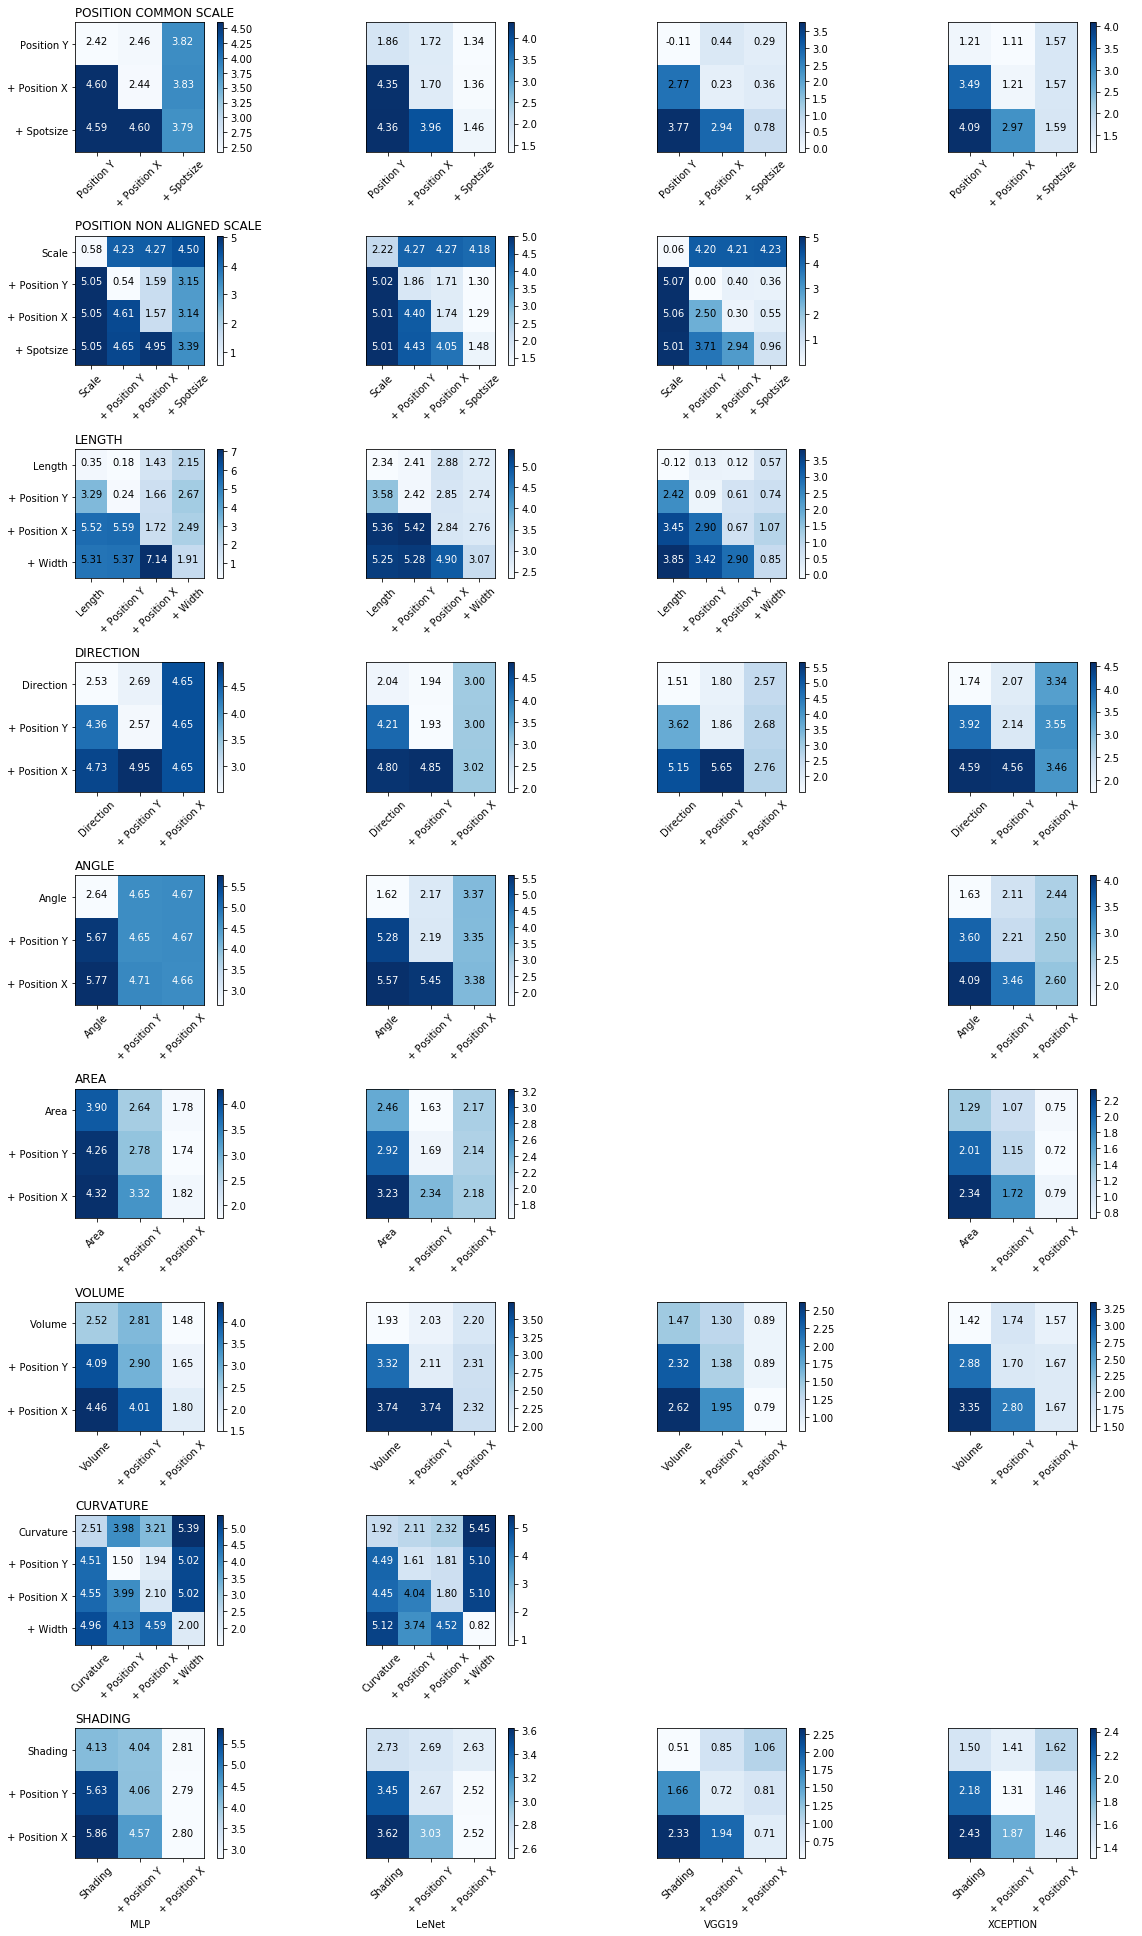

In [68]:
def plot_cross_network(cm, classes, title, cmap=plt.cm.Blues, c_name='', e_name='', last_row=False, first_col=False):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, loc='left')
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    ax = plt.gca()
        
    
    fmt = '.2f'
    thresh = cm.max() / 1.3
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    if first_col:
        plt.ylabel('')
    else:
        ax.get_yaxis().set_ticks([])
    if last_row:
        plt.xlabel(c_name)
#     plt.savefig('../PAPER/SUPPLEMENTAL/gfx/cn_'+str(e_name)+'_'+str(c_name)+'_average.pdf', bbox_inches='tight', pad_inches=0)
    

from matplotlib import gridspec
fig = plt.figure(figsize=(16,len(experiments)*3), facecolor='white')
gs = gridspec.GridSpec(len(experiments), 4, width_ratios=[1,1,1,1])#, wspace=.3, hspace=.8)
    
z = 0
for i,e in enumerate(experiments):

    for j,c in enumerate(CLASSIFIERS):
    
        results = outputs[i][j]
        
        fig = plt.subplot(gs[z])
        z += 1
        

        
        if len(results) == 0:
#             print 'missing', e, c
            plt.axis('off')
            continue
    
        if j == 0:
            current_title = e.upper().split('.')[-1].replace('_', ' ')
        else:
            current_title = ''
            
        
#         if i != 1:
            
#         else:
# #             print labels
#             ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
#             ax.get_yaxis().set_ticklabels(labels)
        
        plot_cross_network(results, classes=all_labels[e],
                              title=current_title, c_name=c, e_name=e, last_row=(i==8), first_col=(j==0))

        
plt.savefig('../PAPER/SUPPLEMENTAL/gfx/cross_network.pdf', bbox_inches='tight', pad_inches=0)

In [6]:
for subdir, _, _ in os.walk(RESULTS_DIR+'/C.Figure3.data_to_piechart'):
#     print subdir
    if len(subdir.split('/')) == 9:
      if len(os.listdir(subdir)) != 8:
        print subdir, len(os.listdir(subdir))
        
#         classifier = subdir.split('/')[-1]
#         dataset = subdir.split('/')[-2]
#         experiment = subdir.split('/')[-3]
        
#         print 'sbatch', experiment + '_' + dataset + '_' + classifier +'_True.sbatch'

/n/regal/pfister_lab/PERCEPTION/RESULTS//C.Figure3.data_to_piechart/MLP 0
/n/regal/pfister_lab/PERCEPTION/RESULTS//C.Figure3.data_to_piechart/LeNet 0
/n/regal/pfister_lab/PERCEPTION/RESULTS//C.Figure3.data_to_piechart/XCEPTION 0
/n/regal/pfister_lab/PERCEPTION/RESULTS//C.Figure3.data_to_piechart/VGG19 0


In [6]:
experiment = 'C.Figure12.data_to_bars'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

bar_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    bar_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    bar_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

In [20]:
len(bar_stats[0][0])

4

In [8]:
experiment = 'C.Figure12.data_to_framed_rectangles'
e_dir = os.path.join(RESULTS_DIR, experiment)
datasets = sorted(os.listdir(e_dir))

rect_stats = [None]*4

classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']
for i,c in enumerate(classifiers):
    
    rect_stats[i] = []
    c_dir = os.path.join(e_dir, c)

    stats_files = glob.glob(c_dir+'/*.p')
    stats_per_c = []
#     print stats_files

    for s in stats_files:
        
        with open(s, 'r') as f:
            stats = pickle.load(f)
        stats_per_c.append(stats)
#         print stats['time']

    rect_stats[i].append(stats_per_c)
            
#         print d, c, np.mean([stats1['MLAE'], stats2['MLAE']])

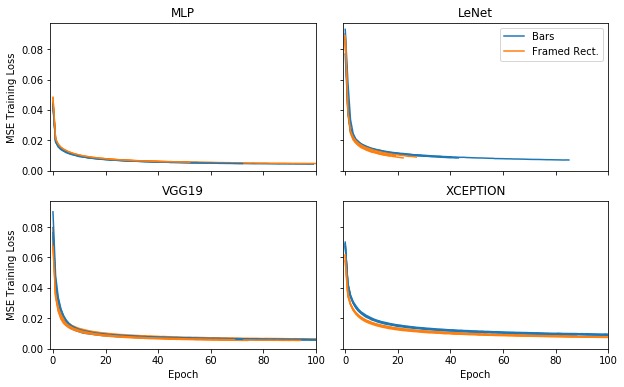

In [26]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Training Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Training Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[0][0])):
        
        # grab sample from both
        bar_loss = bar_stats[i][0][sample]['loss']
        rect_loss = rect_stats[i][0][sample]['loss']
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Bars', color='C0')
            plot(rect_loss, label='Framed Rect.', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(rect_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()

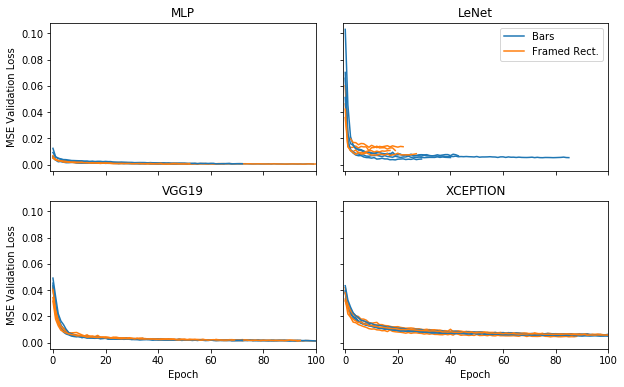

In [27]:
from matplotlib import gridspec


classifiers = ['MLP', 'LeNet', 'VGG19', 'XCEPTION']

fig = plt.figure(figsize=(10,6), facecolor='white')
gs = gridspec.GridSpec(2, 2, width_ratios=[1,1], hspace=.2, wspace=.1)

axes = [None]*4

for i, c in enumerate(classifiers):
    
    if i == 0:
        axes[i] = fig.add_subplot(gs[i])#, sharey=axes[0])
        plt.setp(axes[0].get_xticklabels(), visible=False)
        plt.ylabel('MSE Validation Loss')        
    elif i == 1:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0])
        plt.setp(axes[1].get_yticklabels(), visible=False)
        plt.setp(axes[1].get_xticklabels(), visible=False)      
        
#         plt.ylabel(False)
    elif i == 2:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[0], sharex=axes[0])
        plt.ylabel('MSE Validation Loss')
        plt.xlabel('Epoch')                
    elif i == 3:
        axes[i] = fig.add_subplot(gs[i], sharey=axes[2])
        plt.setp(axes[3].get_yticklabels(), visible=False)        
        plt.xlabel('Epoch')        

    for sample in range(len(bar_stats[0][0])):
        
        # grab sample from both
        bar_loss = bar_stats[i][0][sample]['val_loss']
        rect_loss = rect_stats[i][0][sample]['val_loss']
        if sample == 0:
            # only label the first
            plot(bar_loss, label='Bars', color='C0')
            plot(rect_loss, label='Framed Rect.', color='C1')
        else:
            # but use the same colors for all
            plot(bar_loss, color='C0')
            plot(rect_loss, color='C1')
            
    plt.xlim(-1,100)
    plt.title(c)


    if i == 1:
        plt.legend()

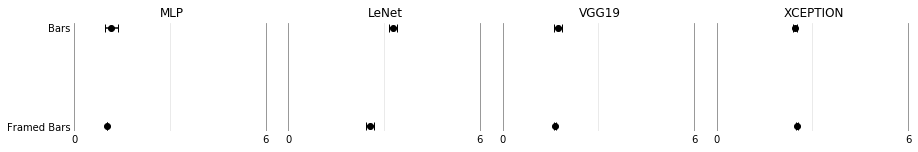

In [33]:
import numpy as np
import scipy as sp
import scipy.stats
from matplotlib import gridspec

fig = plt.figure(figsize=(15,2), facecolor='white')
gs = gridspec.GridSpec(1, 4, width_ratios=[1,1,1,1], wspace=.1)
# experiments = [experiments[1]]

# print experiments

j = 0
for i, c in enumerate(classifiers):

    fig = plt.subplot(gs[j])
    j += 1
    plt.title(c)


    #
    # data
    #
    labels = ['Framed Bars', 'Bars']#all_labels[experiment]
    
    bar_mlae_s = []
    rect_mlae_s = []
    
    for sample in range(len(bar_stats[0][0])):

        # grab sample from both
        bar_mlae = bar_stats[i][0][sample]['MLAE']
        rect_mlae = rect_stats[i][0][sample]['MLAE']
        bar_mlae_s.append(bar_mlae)
        rect_mlae_s.append(rect_mlae)

    # grab the MIDMEANS
    data = [rect_mlae_s, bar_mlae_s]
    sorted_data = [sorted(r) for r in data]
    sorted_data = [[r[1],r[2]] for r in sorted_data]
    data = sorted_data

    means = [np.mean(r) for r in data]
    means = means[::-1] # we start counting from the bottom
#         print means

#         confidence = [mean_confidence_interval(r)[3] for r in data]

    confidence = [1.96*np.std(r) for r in data]
    confidence = confidence[::-1]
    
    y_pos = range(len(means))

    
    plt.xlim(0,6.1)

    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(False)
    ax.spines['left'].set_visible(False)
    if i != 0:
        ax.get_yaxis().set_ticks([])
    else:
#             print labels
        ax.get_yaxis().set_ticks(range(len(labels))) # we set the labels here
        ax.get_yaxis().set_ticklabels(labels)

    ax.get_xaxis().set_ticks(np.arange(0,7,6)) # mark the tange
    ax.get_xaxis().set_ticks(np.arange(3,3.1), minor=True) # mark the center
    ax.tick_params(axis=u'both', which=u'both',length=0)


    # grid lines for X
    plt.grid(True, color='gray', which='major', axis='x', alpha=1)
    plt.grid(True, color='gray', which='minor', axis='x', alpha=0.2)

    errorbars = plt.errorbar(means, y_pos, xerr=confidence, fmt='o', color='black', capsize=4)

# plt.savefig('../PAPER/gfx/figure3_mlae.pdf', bbox_inches='tight', pad_inches=0)